In [1]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size="small", case="constant")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x00\xcc\x08\x06\x00\x00\x00;\xd7\x9c…

In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

# Constant oracle

In [31]:
def constant_oracle(n):

    const_oracle = QuantumCircuit(n+1)
    # Apply the unity gate i.e. do nothing
    
    # Function can be used to draw the qc
    #const_oracle.draw()
    return const_oracle

# Balanced oracle

In [110]:

def balanced_oracle(n):
    
    # Create the quantum circuit object with n+1 qubits
    balanced_oracle = QuantumCircuit(n+1)

    # Controlled-NOT gates
    for qubit in range(n):
        balanced_oracle.cx(qubit, n)
    
    # function below can be used to draw the qc
    #balanced_oracle.draw()
    return balanced_oracle


# Full algorithm

In [112]:
# set the length of the n-bit input string. 
n = 4



dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.barrier()
# Add oracle

oracle = balanced_oracle(n)
#oracle = constant_oracle(n)

dj_circuit += oracle

dj_circuit.barrier()
# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
    
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

/home/zobination/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.


┌───┐ ░            ░                      ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├─░────────────░───■──────────────────░─┤ H ├─░─┤M├─────────
     ├───┤ ░            ░   │                  ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├─░────────────░───┼────■─────────────░─┤ H ├─░──╫─┤M├──────
     ├───┤ ░            ░   │    │             ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├─░────────────░───┼────┼────■────────░─┤ H ├─░──╫──╫─┤M├───
     ├───┤ ░            ░   │    │    │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░────────────░───┼────┼────┼────■───░─┤ H ├─░──╫──╫──╫─┤M├
     └───┘ ░ ┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫─
           ░ └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════════════╩══╩══╩══╩═
                                                          0  1  2  3

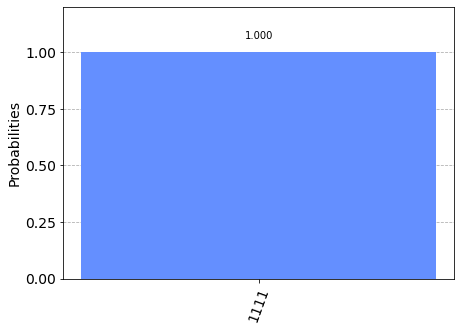

In [113]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

# Qiskit excercises 3.2.6

In [119]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)
n=5
dj_circuit = QuantumCircuit(n+1, n)

In [120]:
# This oracle coming from qiskit_textbook.problems belongs to the Instruction class,
# that's why we use the .definition attribute (in order to make it a QuantumCircuit object)
oracle.definition.draw()

q_0: ──■─────────────────
       │                 
q_1: ──┼────■────────────
       │    │            
q_2: ──┼────┼────■───────
       │    │    │       
q_3: ──┼────┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘

# Test the above oracles

In [127]:
# set the length of the n-bit input string. 
n = 4



dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.barrier()
# Add oracle

#oracle = balanced_oracle(n)
#oracle = constant_oracle(n)
oracle = dj_problem_oracle(4)

dj_circuit += oracle.definition

dj_circuit.barrier()
# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
    
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

/home/zobination/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.


┌───┐ ░            ░       ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├─░────────────░───────░─┤ H ├─░─┤M├─────────
     ├───┤ ░            ░       ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├─░────────────░───────░─┤ H ├─░──╫─┤M├──────
     ├───┤ ░            ░       ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├─░────────────░───■───░─┤ H ├─░──╫──╫─┤M├───
     ├───┤ ░            ░   │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░────────────░───┼───░─┤ H ├─░──╫──╫──╫─┤M├
     └───┘ ░ ┌───┐┌───┐ ░ ┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├┤ H ├─░─┤ X ├─░───────░──╫──╫──╫──╫─
           ░ └───┘└───┘ ░ └───┘ ░       ░  ║  ║  ║  ║ 
c: 4/══════════════════════════════════════╩══╩══╩══╩═
                                           0  1  2  3

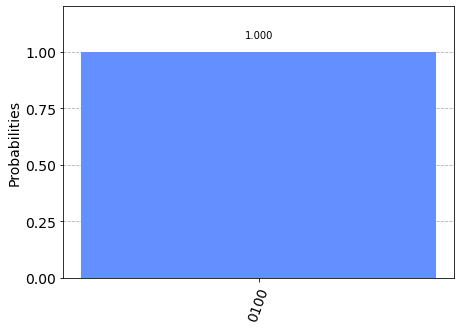

In [128]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)